In [2]:
# !pip install pycaret

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in initial Fake news dataset

In [150]:
fake_news = pd.read_csv("Fake.csv")
true_news = pd.read_csv("True.csv")

In [151]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [152]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [153]:
fake_news.drop_duplicates(inplace=True)
true_news.drop_duplicates(inplace=True)

## eda

In [154]:
fake_news['date'].describe()

count            23478
unique            1681
top       May 10, 2017
freq                46
Name: date, dtype: object

In [155]:
fake_news['date'][0]
print(len(fake_news['date']))
fake_news['date'][23478]

23478


'January 15, 2016'

# add classification column, Real(True) news = 0, Fake news = 1

In [17]:
fake_news['is_fake'] = 1
true_news['is_fake'] = 0

In [78]:
news = pd.concat([fake_news, true_news], ignore_index=True)
# news.drop(['date', 'subject'], axis = 1, inplace = True)
news

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
44684,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44685,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44686,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44687,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


### true vs false countplot

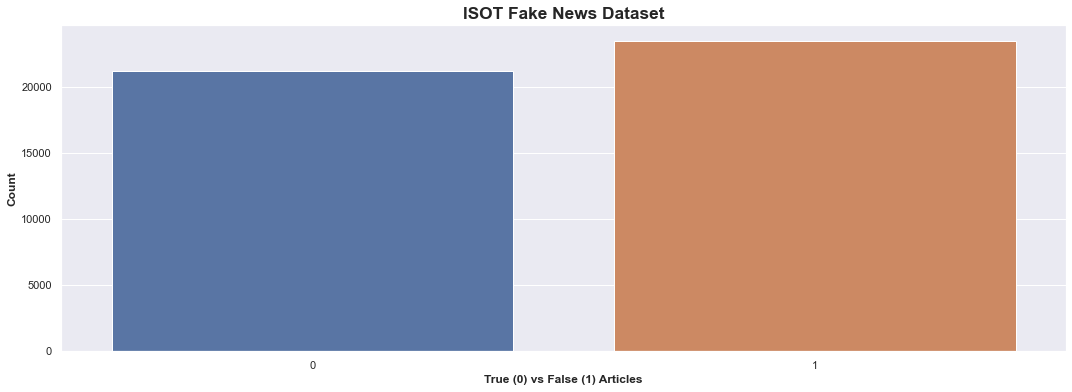

In [265]:
# sns.histplot(data=news, x="is_fake", hue='is_fake', discrete=True)
g = sns.countplot(data=news, x="is_fake")
g.set_title('ISOT Fake News Dataset', size='x-large', fontweight='bold')
g.set_xlabel('True (0) vs False (1) Articles', fontweight='bold') 
g.set_ylabel('Count', fontweight='bold')
plt.savefig('ISOT_TrueFalse_count.png')
plt.show()
plt.close()

In [210]:
#clean text for word freq

from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
# Import stopwords with scikit-learn
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

additional_stop = ["s", "it", "i", 't', 'this', 'in', 'the']
additional_stop = set('s it i t this in the said just like and said. a'.split())

fake_news['text_wout_stop'] = fake_news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
fake_news['text_wout_addstop'] = fake_news['text_wout_stop'].apply(lambda y: ' '.join([w for w in y.split() if w not in (additional_stop)]))

common_words = Counter(" ".join(fake_news["text_wout_addstop"].str.lower()).split()).most_common(25)


### most common words ISOT dataset

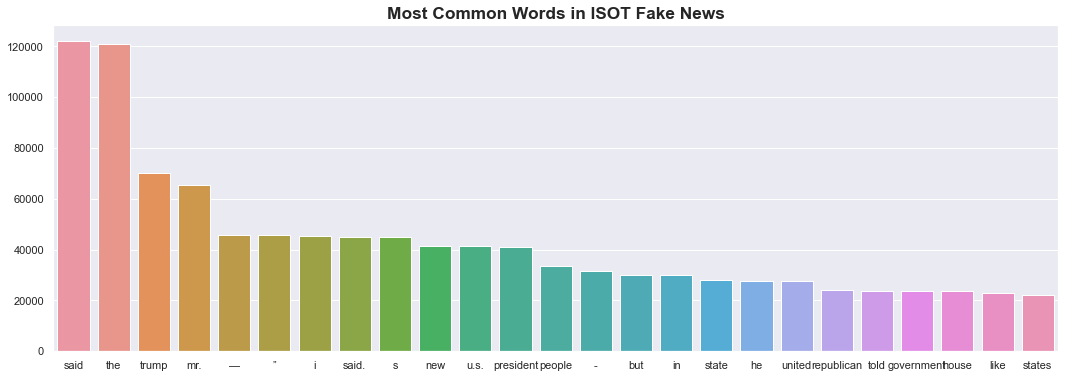

In [266]:
word = []
count = []
for key, value in common_words:
    word.append(key)
    count.append(value)
    
# plt.bar(word, count, width=1.0)
sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(x= word, y=count)
plt.title('Most Common Words in ISOT Fake News', size='x-large', fontweight='bold')
plt.savefig('ISOT_fake_common.png')
plt.show()
plt.close()

In [212]:
true_news['text_wout_stop'] = true_news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
true_news['text_wout_addstop'] = true_news['text_wout_stop'].apply(lambda y: ' '.join([w for w in y.split() if w not in (additional_stop)]))

common_words_true = Counter(" ".join(true_news["text_wout_addstop"].str.lower()).split()).most_common(25)

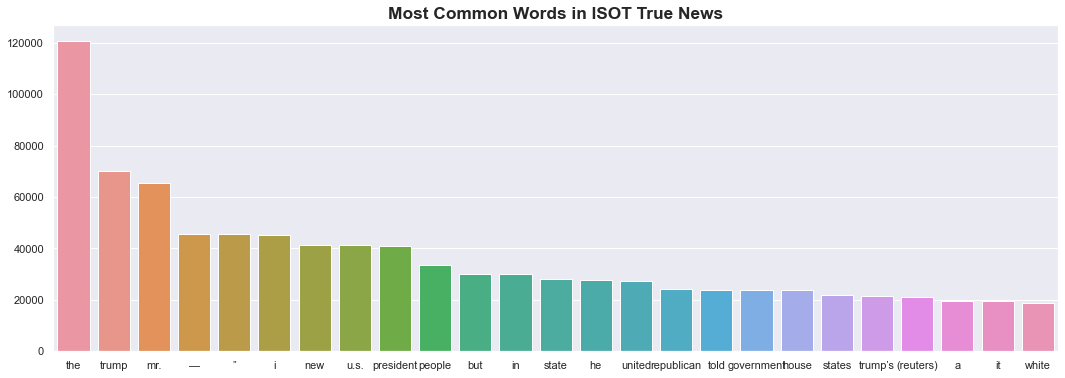

In [267]:
word = []
count = []
for key, value in common_words_true:
    word.append(key)
    count.append(value)
    
# plt.bar(word, count, width=1.0)
sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(x= word, y=count)
plt.title('Most Common Words in ISOT True News', size='x-large', fontweight='bold')
plt.savefig('ISOT_true_common.png')
plt.show()
plt.close()

In [135]:
# fake_counts
# df['response'] = df.response.str.replace("[^\w\s]", "").str.lower()

# df['response'] = df['response'].apply(lambda x: [item for item in x.split() if item not in stop])

,0
0,
the,525499
to,288545
of,235142
and,222323
a,209585
...,...
don,9876
time,9701
now,9645


## Split dataset for training and testing

In [104]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(news['text'], news['is_fake'], test_size=0.2, random_state=42)

In [105]:
X_train.shape
y_train.shape

(35751,)

## Word Vectorizer, remove stop words, Tf-Idf transformer for storage and representation

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
count_transformer = count_vect.fit(X_train)
count_transformer
X_train_counts = count_transformer.transform(X_train)
X_test_counts = count_transformer.transform(X_test)
print(X_train_counts.shape)
print(X_test_counts.shape)

(35751, 111672)
(8938, 111672)


In [107]:
count_vect.vocabulary_.get(u'algorithm')

9883

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
print(X_test_tfidf.shape)

(35751, 111672)
(8938, 111672)


## Multinomial Naive Bayes Model

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [50]:
# train a Naive Bayes classifier
clf = MultinomialNB()
clf


MultinomialNB()

In [51]:
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [52]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test_tfidf)

## Accuracy and confusion matrix

In [53]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.938688744685612


In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3922  278]
 [ 270 4468]]


<AxesSubplot:>

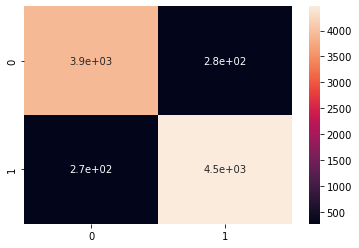

In [55]:
import seaborn as sns
sns.heatmap(cm, annot=True)

## Precision recall f1 and support

In [56]:
from sklearn.metrics import classification_report

# generate classification report
target_names = ['True', 'Fake']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        True       0.94      0.93      0.93      4200
        Fake       0.94      0.94      0.94      4738

    accuracy                           0.94      8938
   macro avg       0.94      0.94      0.94      8938
weighted avg       0.94      0.94      0.94      8938



# Read WELFake dataset for testing of model
### EDA

In [223]:
wel_news = pd.read_csv("WELFake_Dataset.csv")

In [224]:
wel_news.head()
display(wel_news.isna().sum())
wel_news = wel_news.dropna()
wel_news.head()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


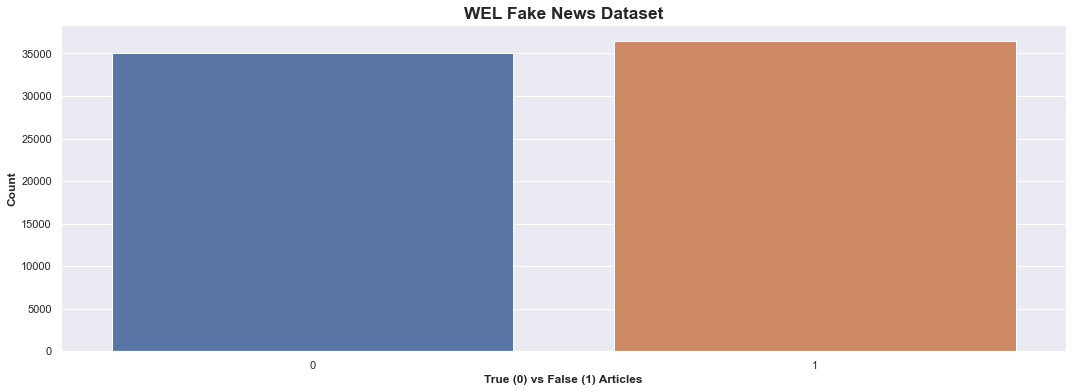

In [268]:
# sns.histplot(data=news, x="is_fake", hue='is_fake', discrete=True)
g2 = sns.countplot(data=wel_news, x="label")
g2.set_title('WEL Fake News Dataset', size='x-large', fontweight='bold')
g2.set_xlabel('True (0) vs False (1) Articles', fontweight='bold') 
g2.set_ylabel('Count', fontweight='bold')
plt.savefig('WEL_TrueFalse_count.png')
plt.show()
plt.close()

In [273]:
wel_true = wel_news.loc[wel_news['label'] == 0]
wel_false = wel_news.loc[wel_news['label'] == 1]

In [274]:
# wel_true.reset_index(inplace=True)

In [275]:
additional_stop = set('s it i t this in the said just like and said. a the --- but " - a'.split())

wel_true['text_wout_stop'] = wel_true['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
wel_true['text_wout_addstop'] = wel_true['text_wout_stop'].apply(lambda y: ' '.join([w for w in y.split() if w not in (additional_stop)]))

common_words_true = Counter(" ".join(wel_true["text_wout_addstop"].str.lower()).split()).most_common(25)

wel_false['text_wout_stop'] = wel_false['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
wel_false['text_wout_addstop'] = wel_false['text_wout_stop'].apply(lambda y: ' '.join([w for w in y.split() if w not in (additional_stop)]))

common_words_false = Counter(" ".join(wel_false["text_wout_addstop"].str.lower()).split()).most_common(25)

C:\Users\arist\AppData\Local\Temp\ipykernel_40340\2910303700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wel_true['text_wout_stop'] = wel_true['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
C:\Users\arist\AppData\Local\Temp\ipykernel_40340\2910303700.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wel_true['text_wout_addstop'] = wel_true['text_wout_stop'].apply(lambda y: ' '.join([w for w in y.split() if w not in (additional_stop)]))
C:\Users\arist\AppData\

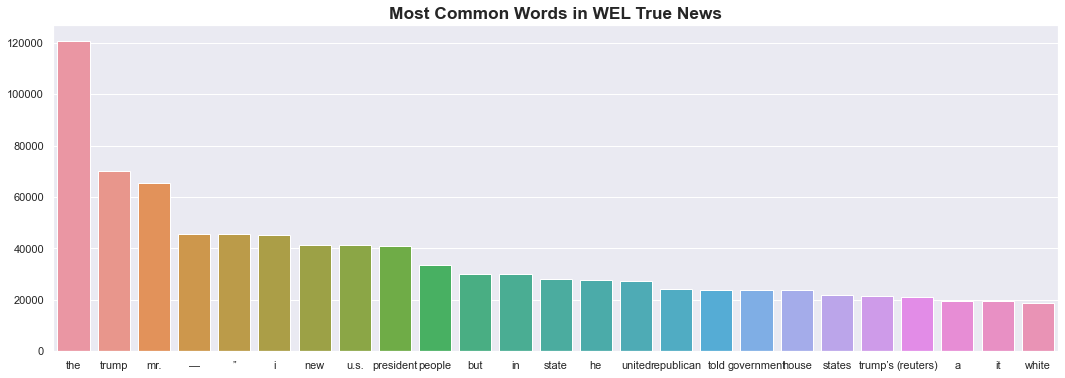

In [276]:
word = []
count = []
for key, value in common_words_true:
    word.append(key)
    count.append(value)
    
# plt.bar(word, count, width=1.0)
sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(x= word, y=count)
plt.title('Most Common Words in WEL True News', size='x-large', fontweight='bold')
plt.savefig('WEL_true_common.png')
plt.show()
plt.close()

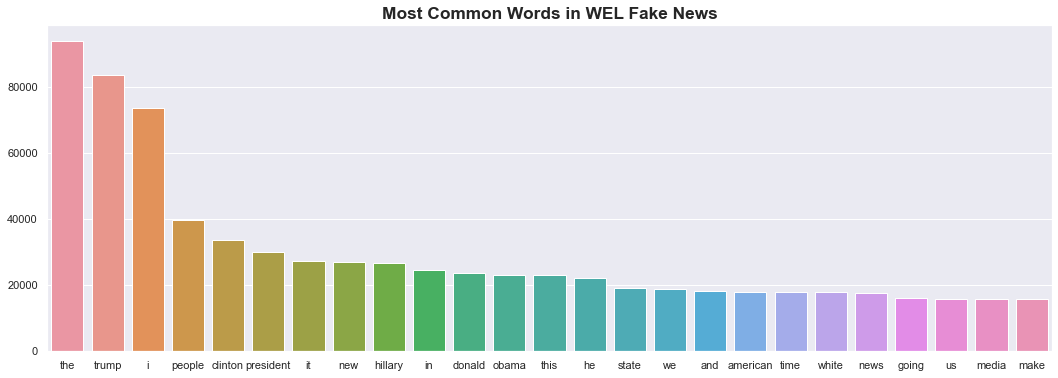

In [272]:
word = []
count = []
for key, value in common_words_false:
    word.append(key)
    count.append(value)
    
# plt.bar(word, count, width=1.0)
sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(x= word, y=count)
plt.title('Most Common Words in WEL Fake News', size='x-large', fontweight='bold')
plt.savefig('WEL_fake_common.png')
plt.show()
plt.close()

## Split into X and y for testing

In [64]:
wel_X = wel_news['text']
display(wel_X.head())
wel_y = wel_news['label']
display(wel_y.head())

0    No comment is expected from Barack Obama Membe...
2     Now, most of the demonstrators gathered last ...
3    A dozen politically active pastors came here f...
4    The RS-28 Sarmat missile, dubbed Satan 2, will...
5    All we can say on this one is it s about time ...
Name: text, dtype: object

0    1
2    1
3    0
4    1
5    1
Name: label, dtype: int64

## Use same count vectorizor, tfidf transform, and model from before for predictions (without retraining)

In [65]:
wel_X_counts = count_transformer.transform(wel_X)
wel_X_tfidf = tfidf_transformer.fit_transform(wel_X_counts)
wel_y_pred = clf.predict(wel_X_tfidf)

## Accuracy, precision, recall f1 and support of previous model on new dataset

In [66]:
acc = accuracy_score(wel_y, wel_y_pred)
print("Accuracy:", acc)

Accuracy: 0.8013335756321903


In [67]:
target_names = ['True', 'Fake']
print(classification_report(wel_y, wel_y_pred, target_names=target_names))

              precision    recall  f1-score   support

        True       0.86      0.71      0.78     35028
        Fake       0.76      0.89      0.82     36509

    accuracy                           0.80     71537
   macro avg       0.81      0.80      0.80     71537
weighted avg       0.81      0.80      0.80     71537



## Training WEL Fake model on itself for validation

In [257]:
X_train, X_test, y_train, y_test = train_test_split(wel_news['text'], wel_news['label'], test_size=0.2, random_state=42)

count_transformer = count_vect.fit(X_train)
count_transformer
X_train_counts = count_transformer.transform(X_train)
X_test_counts = count_transformer.transform(X_test)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

(57229, 219661)


In [258]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

In [259]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8683953033268101


In [260]:
target_names = ['True', 'Fake']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        True       0.86      0.87      0.87      7081
        Fake       0.87      0.86      0.87      7227

    accuracy                           0.87     14308
   macro avg       0.87      0.87      0.87     14308
weighted avg       0.87      0.87      0.87     14308

